In [ ]:
pip install fastai --upgrade 

In [ ]:
from fastai.vision.all import *

In [ ]:
!pip install kaggle
from google.colab import files
files.upload()

In [ ]:
ls -1ha kaggle.json

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
## !kaggle datasets download -d abdallahalidev/plantvillage-dataset
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

In [ ]:
! unzip /content/new-plant-diseases-dataset.zip

In [ ]:
path = '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)'

In [ ]:
fns=get_image_files(path)
fns

(#87883) [Path('/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Strawberry___Leaf_scorch/f6b3a819-04dd-41d8-9cac-042f857d009a___RS_L.Scorch 0791.JPG'),Path('/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Strawberry___Leaf_scorch/98ddf858-e4f2-4a85-a98c-c1143d4c7394___RS_L.Scorch 9970.JPG'),Path('/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Strawberry___Leaf_scorch/55c573e1-27ba-49d7-b56d-829dbe4c97d9___RS_L.Scorch 0157.JPG'),Path('/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Strawberry___Leaf_scorch/0c6d5127-86d7-4956-a93e-09963cf52f7f___RS_L.Scorch 0913_flipLR.JPG'),Path('/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Strawberry___Leaf_scorch/ef1d40a9-1df2-4e0d-b82a-95626f1fc476___RS_L.Scorch 1049.JPG'),Path('/content/New Plant Diseases Dataset(Augmented)/New Plant 

In [ ]:
leaf=DataBlock(blocks=(ImageBlock,CategoryBlock),
               get_items=get_image_files,
               splitter=RandomSplitter(valid_pct=(0.2),seed=42),
               get_y=parent_label,item_tfms=Resize(224))

In [ ]:
leaf = leaf.new(item_tfms=Resize(224), batch_tfms=aug_transforms(mult=1.0, do_flip=True, flip_vert=True, max_rotate=40.0, min_zoom=1.0, max_zoom=1.1, max_lighting=0.2, max_warp=0.2, p_affine=0.75, p_lighting=0.75, xtra_tfms=None, size=None, mode='bilinear', pad_mode='reflection', align_corners=True, batch=False, min_scale=1.0))

In [ ]:
dls=leaf.dataloaders(path,num_workers = 0,bs=64)
dls.train.show_batch(max_n=12, nrows = 2, unique = True)

In [ ]:
learner=cnn_learner(dls,resnet50,metrics=[accuracy, error_rate])

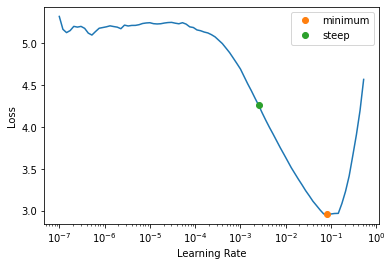

In [ ]:
lr_min,lr_steep = learner.lr_find(suggest_funcs=(minimum,steep))

In [ ]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Minimum/10: 8.32e-03, steepest point: 2.51e-03


In [ ]:
lr_steep

0.002511886414140463

In [ ]:
lr_min

0.00831763744354248

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.226502,0.109373,0.963132,0.036868,10:59


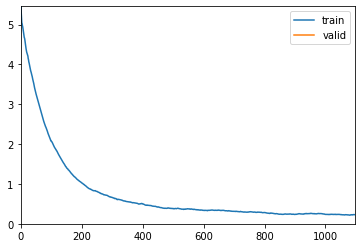

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.086726,0.033245,0.988450,0.011550,12:27
1,0.065399,0.048280,0.985605,0.014395,12:25
2,0.049320,0.019072,0.994254,0.005746,12:24
3,0.025835,0.010851,0.996757,0.003243,12:24
4,0.008304,0.005728,0.998748,0.001252,12:25
5,0.003756,0.003793,0.998976,0.001024,12:25


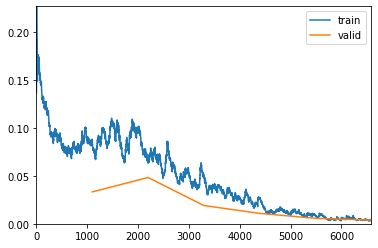

In [ ]:
learner.fine_tune(6,base_lr=lr_steep,cbs=[ShowGraphCallback()])

In [ ]:
from google.colab import files
learner.export('resnet50_train.pkl')
files.download('resnet50_train.pkl')

In [ ]:
files.upload()

In [ ]:
from PIL import Image
import os

img = Image.open('/content/scorch.jpg')

os.remove('test.jpg')
img_resize = img.resize((224, 224))
img_resize.save('test.jpg')

In [ ]:
learn_test = load_learner('/content/resnet50_train.pkl')
learn_test.predict("/content/test.jpg")

('Potato___Late_blight',
 tensor(21),
 tensor([1.4121e-02, 4.7460e-06, 5.9281e-04, 8.3982e-08, 3.2101e-01, 3.7067e-09,
         6.7485e-04, 2.0639e-04, 2.9904e-02, 1.3115e-03, 7.8185e-06, 2.4475e-08,
         4.5976e-05, 1.1874e-07, 8.0107e-08, 1.6343e-02, 1.0353e-07, 8.0759e-10,
         1.7359e-02, 2.1977e-07, 1.2202e-02, 5.8363e-01, 1.8573e-06, 6.5603e-09,
         3.1820e-06, 2.7392e-08, 8.3374e-04, 1.7793e-06, 1.5095e-06, 1.3477e-08,
         1.6074e-03, 1.0064e-04, 1.0009e-05, 1.9504e-08, 2.1314e-07, 1.3547e-07,
         7.6931e-08, 2.8608e-05]))